In [1]:
import numpy as np
import pandas as pd
import quandl
quandl.ApiConfig.api_key = '_fgkxjSbt5389zGt4crC'
spy_table = quandl.get('BCIW/_SPXT')
amzn_table = quandl.get('WIKI/AMZN')


In [2]:
spy = spy_table.loc['2016',['Close']]
amzn = amzn_table.loc['2016',['Close']]
spy_log = np.log(spy.Close).diff().dropna()
amzn_log = np.log(amzn.Close).diff().dropna()

In [3]:
df = pd.concat([spy_log,amzn_log],axis = 1).dropna()
df.columns = ['spy','amzn']
df.tail()

,spy,amzn
Date,,
2016-12-23,0.001351,-0.007531
2016-12-27,0.002254,0.014113
2016-12-28,-0.008218,0.000946
2016-12-29,-0.000247,-0.009081
2016-12-30,-0.004601,-0.020172


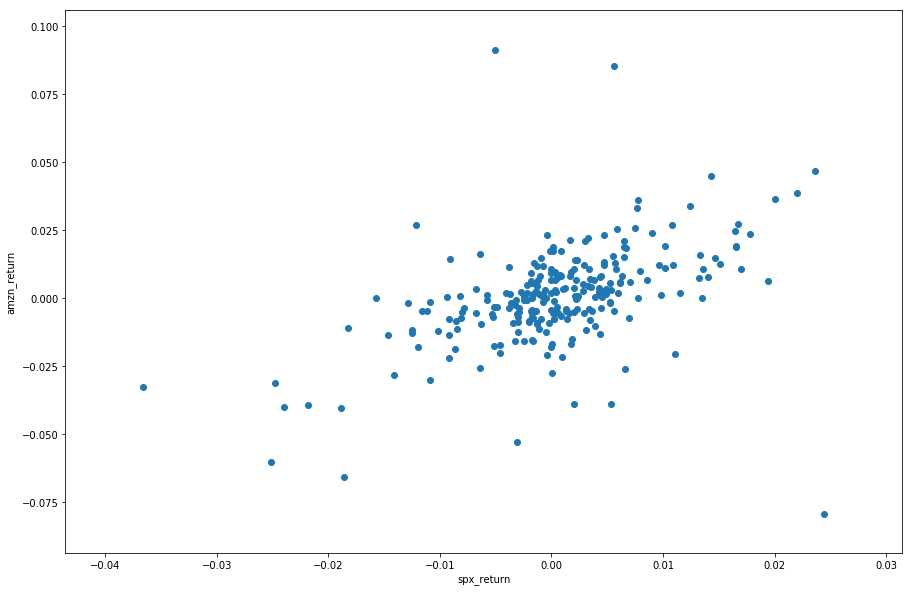

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.scatter(df.spy,df.amzn)
plt.xlabel('spx_return')
plt.ylabel('amzn_return')
plt.show()

In [5]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'amzn~spy',data = df).fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:                   amzn   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     76.13
Date:                Wed, 19 Jul 2017   Prob (F-statistic):           3.88e-16
Time:                        10:16:05   Log-Likelihood:                 681.59
No. Observations:                 251   AIC:                            -1359.
Df Residuals:                     249   BIC:                            -1352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.876e-05      0.001      0.097      0.9

In [6]:
print 'pamameters: ',model.params
print 'residual: ', model.resid.tail()
print 'fitted values: ',model.predict()[-6:]

pamameters:  Intercept    0.000099
spy          1.079555
dtype: float64
residual:  Date
2016-12-23   -0.009089
2016-12-27    0.011580
2016-12-28    0.009719
2016-12-29   -0.008914
2016-12-30   -0.015304
dtype: float64
fitted values:  [-0.00177912  0.0015574   0.0025321  -0.0087734  -0.00016743 -0.0048679 ]


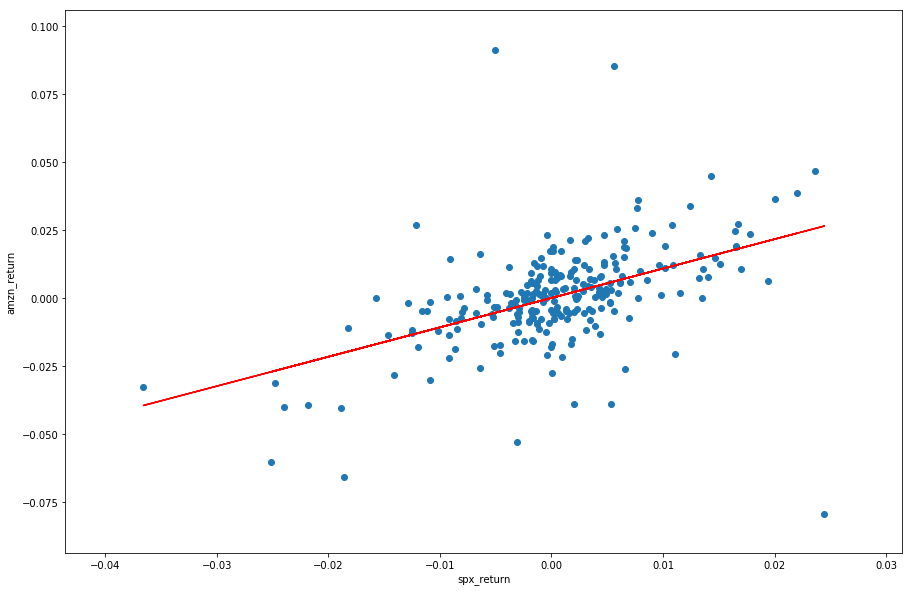

In [7]:
plt.figure(figsize = (15,10))
plt.scatter(df.spy,df.amzn)
plt.xlabel('spx_return')
plt.ylabel('amzn_return')
plt.plot(df.spy,model.predict(),color = 'red')
plt.show()